The goal of this project is to classify emails as spam or ham.

For this classifiction i will use svm algorithm and RandomForestclassifier and pick the one with the highest accuracy.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Dataset.csv',encoding='latin-1')

# Explore and perform necessary operations on the data

In [3]:
df.shape ##This will show us the number of rows and columns in the data respectively.

(5572, 2)

In [4]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar then Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


As the names v1 and v2 are not descriptive we will need to rename them to more descriptive names.

In [5]:
df.rename(columns={'v1':'Target','v2':'Email'},inplace=True)

In [6]:
df.head()

,Target,Email
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar then Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df['Target'].value_counts()

ham     4825
spam     747
Name: Target, dtype: int64

([<matplotlib.patches.Wedge at 0x2efd61018a0>,
 [Text(-1.0038714981945518, 0.4497132587689916, 'Ham'),
  Text(1.0038714771419537, -0.44971330576360763, 'Spam')],
 [Text(-0.5475662717424827, 0.24529814114672266, '86.59%'),
  Text(0.5475662602592474, -0.2452981667801496, '13.41%')])

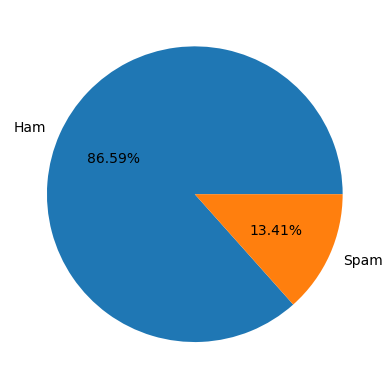

In [8]:
plt.pie(df['Target'].value_counts(),autopct='%0.2f%%',labels=('Ham','Spam'))

In [9]:
df['num_characters']=df['Email'].apply(len)

In [10]:
df.sample(5)

,Target,Email,num_characters
1905,ham,"There're some people by mu, I'm at the table b...",54
904,ham,"We're all getting worried over here, derek and...",84
1403,ham,cool. We will have fun practicing making babies!,48
4978,ham,Spending new years with my brother and his fam...,111
1760,ham,Nt yet chikku..simple habba..hw abt u?,38


From the representation we can see that the dataset is imbalanced.And we will have to deal with it later on so as to obtain a balanced
dataset.

Now we can start the datacleaning process through the following steps:

1.Lowercasing all characters of the email.

2.Removal of punctuations and numbers.

3.Removal of stopwords.

4.Tokenizatiomn and lammetization

5.LabelEncoding the target variable

In [11]:
def lower_case(text):
    return text.lower()

In [12]:
df['Clean_Email']= df['Email'].apply(lambda x: lower_case(x))

In [13]:
df.head()

,Target,Email,num_characters,Clean_Email
0,ham,"Go until jurong point, crazy.. Available only ...",111,"go until jurong point, crazy.. available only ..."
1,ham,Ok lar then Joking wif u oni,30,ok lar then joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,49,u dun say so early hor... u c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"nah i don't think he goes to usf, he lives aro..."


In [14]:
##This will remove any special characters and numbers
import re
def remove_numbers(text):
    pattern = r'[^a-zA-Z]'
    numberless = re.sub(pattern," ",string=text)
    return numberless

In [15]:
df['Clean_Email']=df['Clean_Email'].apply(lambda x: remove_numbers(x))

In [16]:
df.head()

,Target,Email,num_characters,Clean_Email
0,ham,"Go until jurong point, crazy.. Available only ...",111,go until jurong point crazy available only ...
1,ham,Ok lar then Joking wif u oni,30,ok lar then joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry in a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,49,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah i don t think he goes to usf he lives aro...


In [17]:
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize

In [18]:
from nltk.stem import WordNetLemmatizer
lem = WordNetLemmatizer()
def remove_stopwords(text):
    text = word_tokenize(text)
    removed = []
    for i in text:
        if i not in stopwords.words('English'):
            lemma = lem.lemmatize(i)
            removed.append(lemma)
    return " ".join(removed)

In [19]:
df['Clean_Email']=df['Clean_Email'].apply(lambda x: remove_stopwords(x))

In [20]:
df.head()

,Target,Email,num_characters,Clean_Email
0,ham,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazy available bugis n great ...
1,ham,Ok lar then Joking wif u oni,30,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry wkly comp win fa cup final tkts st ...
3,ham,U dun say so early hor... U c already then say...,49,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah think go usf life around though


In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Target'] = le.fit_transform(df['Target'])

In [22]:
df.head()

,Target,Email,num_characters,Clean_Email
0,0,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazy available bugis n great ...
1,0,Ok lar then Joking wif u oni,30,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry wkly comp win fa cup final tkts st ...
3,0,U dun say so early hor... U c already then say...,49,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,nah think go usf life around though


In [23]:
df['num_characters_2'] = df['Clean_Email'].apply(len)

In [24]:
df.head()

,Target,Email,num_characters,Clean_Email,num_characters_2
0,0,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazy available bugis n great ...,82
1,0,Ok lar then Joking wif u oni,30,ok lar joking wif u oni,23
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry wkly comp win fa cup final tkts st ...,101
3,0,U dun say so early hor... U c already then say...,49,u dun say early hor u c already say,35
4,0,"Nah I don't think he goes to usf, he lives aro...",61,nah think go usf life around though,35


In [25]:
data = df[['Target','Clean_Email']]

In [26]:
data.head()

,Target,Clean_Email
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,free entry wkly comp win fa cup final tkts st ...
3,0,u dun say early hor u c already say
4,0,nah think go usf life around though


VECTORIZING THE EMAIL

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [28]:
x = tfidf.fit_transform(data['Clean_Email']).toarray()

In [29]:
print(x)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [30]:
y = data['Target']

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

AS our dataset was  imbalanced we need to balance it before passing it to our model.
We will use RandomOverSampler to balance our dataset

In [33]:
from collections import Counter

In [34]:
Counter(y_train)

Counter({1: 598, 0: 3859})

In [35]:
from imblearn.over_sampling import RandomOverSampler
ROS =RandomOverSampler(sampling_strategy=1)

In [36]:
x_train_r,y_train_r = ROS.fit_resample(x_train,y_train)

In [37]:
Counter(y_train_r)

Counter({1: 3859, 0: 3859})

In [38]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

In [39]:
GB = GaussianNB()

In [40]:
GB.fit(x_train_r,y_train_r)

GaussianNB()

In [41]:
GB.score(x_test,y_test)

0.8699551569506726

In [42]:
BMB = BernoulliNB()

In [43]:
BMB.fit(x_train_r,y_train_r)

BernoulliNB()

In [44]:
BMB.score(x_test,y_test)

0.9901345291479821

In [45]:
MB =MultinomialNB()

In [46]:
MB.fit(x_train_r,y_train_r)

MultinomialNB()

In [47]:
MB.score(x_test,y_test)

0.9632286995515695

# MODEL EVALUATION

In [48]:
from sklearn.metrics import(
   accuracy_score,
   confusion_matrix,
   ConfusionMatrixDisplay,
    f1_score,
  classification_report,
)

In [49]:
y_pred = BMB.predict(x_test)
accuracy = accuracy_score(y_pred,y_test)
f1 = f1_score(y_pred,y_test,average ='weighted')

In [50]:
print(accuracy)
print(f1)

0.9901345291479821
0.9902956627599657


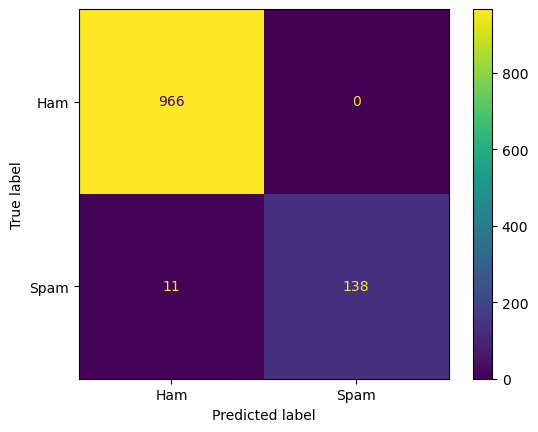

In [51]:
labels = ["Ham", "Spam"]
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       966
           1       1.00      0.93      0.96       149

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.98      1115
weighted avg       0.99      0.99      0.99      1115



In conclusion the model performs well as based on the report precision,recall and f1-score have a high value.

# MODEL CREATION USING RandomForestClassifier

In [53]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [54]:
from sklearn.model_selection import RandomizedSearchCV

In [55]:
###hyperparameters
n_estimators = [int(x) for x in np.linspace(start=100,stop=1200,num =12)]##number of forests
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(start=5,stop=30,num =6)]
min_samples_split=[2,4,10,15,100]
min_samples_leaf=[1,2,5,10]

In [56]:
grid = {
    "n_estimators": n_estimators,
    "max_features": max_features,
    "max_depth": max_depth,
    "min_samples_split": min_samples_split,
    "min_samples_leaf": min_samples_leaf
}

In [57]:
model = RandomizedSearchCV(estimator=rfc,param_distributions=grid,n_iter=10,n_jobs=1,cv=5,verbose=2)

In [58]:
model.fit(x_train_r,y_train_r)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=600; total time=  58.2s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=600; total time=  53.6s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=600; total time=  52.8s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=600; total time=  52.0s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=600; total time=  58.0s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=800; total time= 1.2min
[CV] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=800; total time= 1.3min
[CV] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_est

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 4, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   verbose=2)

# MODEL EVALUATION

In [59]:
from sklearn.metrics import(
   accuracy_score,
   confusion_matrix,
   ConfusionMatrixDisplay,
    f1_score,
  classification_report,
)

In [60]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_pred,y_test)
f1 = f1_score(y_pred,y_test,average ='weighted')

In [61]:
print(accuracy)
print(f1)

0.97847533632287
0.9785369251723051


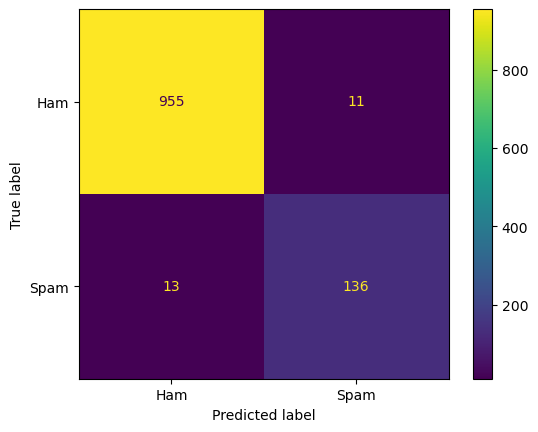

In [62]:
labels = ["Ham", "Spam"]
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

In [63]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       966
           1       0.93      0.91      0.92       149

    accuracy                           0.98      1115
   macro avg       0.96      0.95      0.95      1115
weighted avg       0.98      0.98      0.98      1115



From the above scores we can see that bernoulliNB has accuracy,recall and f1score and hence i will use this model.

SAVING THE MODEL

In [72]:
import pickle
pickle.dump(BMB,open('model.pkl','wb'))
pickle.dump(BMB,open('vectorizer','wb'))